# Assignment 1: 02805 Social graphs and interactions 
### Group 65:
- s184139, Oliver Low Petersen
- s211901, Lucas Kræmmer Petersen
- s226625, Emma Rebner 


## Assignment 1.1

### Part 1)
**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

**Answer**: 

Random networks fail as a model of real networks because they predict a narrow degree distribution, where all nodes have about the same number of links, whereas real networks show wide variability with both low-degree nodes and highly connected hubs.

# Exercises: Did you really read the text?
2) List the four regimes that characterize random networks as a function of.

The four regimes of random networks, as a function of the average degree ‹k›, are:
- Subcritical (‹k› < 1): The network is broken into many small clusters, with no giant component.
- Critical (‹k› = 1): A phase transition takes place; the largest cluster grows to about N^(2/3) but still represents only a small fraction of the network.
- Supercritical (‹k› > 1): A giant component forms and containing a finite share of the nodes, while smaller isolated clusters remain.
- Connected (‹k› ≳ lnN): The giant component includes almost all nodes, which makes the network fully connected

3) According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  decreases as a function of  in real-world networks?

**Answer**:

The problem is that random networks predict clustering to be the same for all nodes, 
regardless of degree, whereas in real networks clustering decreases as degree increases. 
The missing degree–clustering relationship means random networks cannot reproduce the hierarchical and community structures 
that exist in real systems. For example, studies of the Internet, science collaboration networks, and protein interaction networks show that high-degree nodes (hubs) have much lower clustering
than low-degree nodes, a pattern completely absent in random networkfsd

# Exercises: WS edition

In [1]:

# 1) Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each with average degree = 4, and rewiring probablity p =0,01 and 1.
# Calculate the average shortest path length <d> for each one.

import networkx as nx
import numpy as np

# Parameters
N = 500
k = 4
ps = [0, 0.1, 1]

for p in ps:
  G = nx.watts_strogatz_graph(N, k, p)
  avg_shortest_path = nx.average_shortest_path_length(G)
  print(f"p={p}: <d> = {avg_shortest_path:.3f}")


p=0: <d> = 62.876
p=0.1: <d> = 8.622
p=1: <d> = 4.762


2) Describe what happens to the network when p=1 

**Answer**: 

For p=1,the network becomes fully randomized, and the paths are even shorter (⟨d⟩≈4.8).
When p=1, all edges in the Watts–Strogatz model are rewired randomly, which destroys the regular lattice structure and produces a network that behaves like an Erdős–Rényi random graph. 
In this regime, the average shortest path length is very small, scaling on the order of log(N), 
while the clustering coefficient is low because local connections are no longer preserved. 

In [2]:
# 3) Generate a lot of networks with different values of p.
# You will notice that paths are short when p=0 is close to one and they are long when p. 
# What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

import networkx as nx
import numpy as np


# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05,0.6, 0.1, 0.2, 1]

results = []

for p in p_values:
    path_lengths = []
    for _ in range(20):  
        G = nx.watts_strogatz_graph(N, k, p)
        avg_len = nx.average_shortest_path_length(G)
        path_lengths.append(avg_len)
    mean_d = np.mean(path_lengths)
    results.append((p, mean_d))
    print(f"p={p}: <d> ≈ {mean_d:.3f}")

# ANSWER:
# The results show that the average shortest path length decreases very rapidly as p increases from zero. By p≈0.05–0.1,
# the distances are already close to those observed in the fully randomized case (p=1), where ⟨d⟩ stabilizes around 4–5. Larger values of 
# p such as 0.6 or 1 do not change the distance significantly, since the network has reached the random-graph limit (⟨d⟩∼logN).

p=0: <d> ≈ 62.876
p=0.01: <d> ≈ 24.338
p=0.03: <d> ≈ 12.602
p=0.05: <d> ≈ 10.227
p=0.6: <d> ≈ 4.866
p=0.1: <d> ≈ 7.818
p=0.2: <d> ≈ 6.127
p=1: <d> ≈ 4.761


p=0: mean <d> ≈ 62.876, std ≈ 0.000
p=0.01: mean <d> ≈ 24.195, std ≈ 5.936
p=0.03: mean <d> ≈ 13.368, std ≈ 1.375
p=0.05: mean <d> ≈ 10.202, std ≈ 0.607
p=0.1: mean <d> ≈ 7.741, std ≈ 0.290
p=0.2: mean <d> ≈ 6.152, std ≈ 0.109


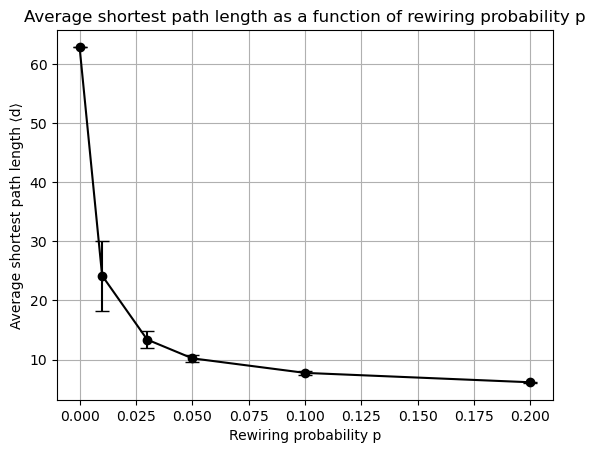

In [3]:
#===Exercises: WS edition===#
# 4) Generate 50 networks with N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 
# Calculate the average of as well as the standard deviation over the 50 networks, to create a plot that shows how the
# path length decreases very quickly with only a little fraction of re-wiring. 

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

results = []

for p in p_values:
    d_values = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_d = nx.average_shortest_path_length(G)
        d_values.append(avg_d)
    mean_d = np.mean(d_values)
    std_d = np.std(d_values)
    results.append((p, mean_d, std_d))
    print(f"p={p}: mean <d> ≈ {mean_d:.3f}, std ≈ {std_d:.3f}")

# Extract results
p_list = [r[0] for r in results]
mean_list = [r[1] for r in results]
std_list = [r[2] for r in results]

# Plot with errorbar
plt.errorbar(p_list, mean_list, yerr=std_list, fmt='o-', capsize=5, color='black', ecolor='black', markerfacecolor='black')
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("Average shortest path length as a function of rewiring probability p")
plt.grid(True)
plt.show()


5) Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

**Answer**:

The plot shows the average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz model with 
N=500 nodes and average degree ⟨k⟩=4. For each value of p∈{0,0.01,0.03,0.05,0.1,0.2}, 50 independent network realizations were generated. 
The black circles indicate the mean value of ⟨d⟩, while the vertical error bars represent the standard deviation across the 50 networks.
The results show that in the regular lattice (p=0) the average path length is very large, but it decreases sharply as soon as a small fraction of edges are rewired 
(p=0.01–0.05). Beyond p≈0.1. The average path length is already close to the random-graph limit, and further rewiring does not reduce distances significantly.
This illustrates the small-world effect; only a small amount of randomness is required to drastically shorten global distances while maintaining some local clustering.

## Part 2)
**What are the three slope dependent regimes of complex networks with power-law degree distributions?**

### The three γ-dependent regimes for power-law degree distributions (Barabási, ch. 4.7)

**1) Anomalous regime ($\gamma < 2$)**  
- $\langle k \rangle$ (and higher moments) diverge as $N \to \infty$.  
- The predicted largest hub grows faster than $N$; large simple graphs with $\gamma<2$ are not graphical without multi-edges/self-loops.

**2) Scale-free regime ($2 < \gamma < 3$)**  
- $\langle k \rangle$ is finite but $\langle k^2 \rangle$ diverges.  
- Strong hubs; maximum degree scales as
$$
k_{\max} \sim N^{\frac{1}{\gamma-1}}
$$
  (sublinear in $N$).  
- **Ultra-small world:** $\langle d \rangle \sim \ln \ln N$.

**3) Random-network regime ($\gamma > 3$)**  
- Both $\langle k \rangle$ and $\langle k^2 \rangle$ are finite.  
- Behavior resembles an Erdős–Rényi graph: **small-world** distances $\langle d \rangle \sim \ln N$, with rarer/smaller hubs.

### What are the three regimes we find in non-linear preferential attachement? (Barabási, ch. 5)

Let the attachment rule be $\,\Pi(k) \propto k^{\alpha}\,$.

**1) Sublinear ($0<\alpha<1$)**  
Preference for high-degree nodes is weak. The degree distribution is stretched-exponential, so hubs remain limited.

**2) Linear ($\alpha=1$)** — Barabási–Albert case  
“Rich-get-richer.” The degree distribution follows a power law $P(k)\sim k^{-3}$ (for $m=1$); clear hubs appear.

**3) Superlinear ($\alpha>1$)**  
Preference is very strong, leading to condensation: a small set of nodes captures a macroscopic fraction of links (star-like structure), not scale-free in the large-$N$ limit.

## Barabasi-Albert model

The aim of this section is to build a BA network step-by-step while documenting the code provided to do so.
In order to achieve plotting the BA network we have to go through the following steps:

### Step 1 — Initialization

In [4]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Simple plot defaults
plt.rcParams.update({
    "figure.figsize": (6, 4),
    "axes.grid": True,
})

def summary(G, title="Graph"):
    degs = [d for _, d in G.degree()]
    print(f"{title}")
    print(f"nodes = {G.number_of_nodes()}, edges = {G.number_of_edges()}")
    print(f"min degree = {min(degs)}, max degree = {max(degs)}, mean degree = {np.mean(degs):.2f}")


### Step 1 — Initialize with a single link

Create an undirected graph with two nodes and one edge.


In [5]:
G = nx.Graph()
G.add_edge(1, 2)


### Step 2 — Add a node and connect in proportion to degree

To connect the new node in proportion to degree, we first take the current edge list `list(G.edges())` and flatten it into a simple list of node ID's by appending both endpoints of every edge. Because each edge contributes its two endpoints, a node appears in this flattened list exactly as many times as its degree. Selecting a node uniformly at random from this list using `random.choice` therefore chooses nodes with probability proportional to their degree. After selecting the target, we create the next integer-labeled node `n` and add a single edge `(n, target)`.

We start by connecting the new node to an existing node with probability proportional to its degree.  
If we take the current list of edges and flatten it into a list of node IDs by adding both endpoints of every edge, then each node appears exactly as many times as its degree.  
Choosing uniformly at random from this flattened list is therefore the same as choosing a node with probability proportional to its degree.

In [6]:
connections = []
for u, v in G.edges():
    connections.append(u)  # endpoint u
    connections.append(v)  # endpoint v

After creating the initialized setup of two nodes connected to eachother we save the paired connection to our connections list and by summarizing the graph we get:

In [7]:
summary(G, "After adding one node")
print("\nList of the flattened graph network: ", connections)

After adding one node
nodes = 2, edges = 1
min degree = 1, max degree = 1, mean degree = 1.00

List of the flattened graph network:  [1, 2]


We start by choosing a target node in the flattened graph. The nodes appear in `connections` as many times as their degree. We choose the target node randomly by a uniform distribution. We create a function `add_one_node_by_degree(G)` which grows the graph by **one** node.

In [8]:
import random

def add_one_node_by_degree(G, connections):
    if G.number_of_edges() == 0:
        raise ValueError("The graph must have at least one edge before adding nodes by degree.")
    
    target = random.choice(connections)
    new_node = G.number_of_nodes() + 1
    
    G.add_edge(new_node, target)

    connections.append(target)
    connections.append(new_node)
    
    return G, connections




We then call the function and print the the flattened node conections list: 

In [9]:
G, connections = add_one_node_by_degree(G, connections)
summary(G, "After adding one node")
print("\nList of the flattened graph network: ", connections)
print("\nNumber of nodes:", G.number_of_nodes())

After adding one node
nodes = 3, edges = 2
min degree = 1, max degree = 2, mean degree = 1.33

List of the flattened graph network:  [1, 2, 1, 3]

Number of nodes: 3


### Step 3 — Keep going until you have a 100 node network

We repeatedly call our `add_one_node_by_degree(G, connections)` function to grow the graph.  

In [10]:
to_add = 100 - G.number_of_nodes()

for i in range(to_add):
    G, connections = add_one_node_by_degree(G, connections)

summary(G, "After growth to N=100")

After growth to N=100
nodes = 100, edges = 99
min degree = 1, max degree = 22, mean degree = 1.98


### Step 4 — Plot the network.

We count how many nodes have each degree \(k\) and plot the result. Below we count all the unique degrees


In [11]:
degrees = np.array([d for _, d in G.degree()], dtype=int)
k_vals, counts = np.unique(degrees, return_counts=True)
print("Unique degrees (k):", k_vals)
print("Counts of each degree:", counts)

Unique degrees (k): [ 1  2  3  4  6  7  8 10 22]
Counts of each degree: [66 16  8  4  1  2  1  1  1]


We then plot them into the linear plot

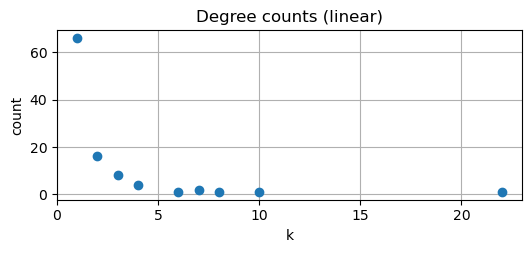

In [12]:
plt.figure(figsize=(6, 2.2))
plt.plot(k_vals, counts, marker='o', linestyle='None')
plt.xlabel('k')
plt.ylabel('count')
plt.xlim(0, k_vals.max() + 1)
plt.title('Degree counts (linear)')
plt.show()

### Step 5 — 5000 edges.

Using the same method as earlier we simply grow our graph using `add_one_node_by_degree(G, connections)`:

In [13]:
to_add = 5000 - G.number_of_nodes()

for i in range(to_add):
    G, connections = add_one_node_by_degree(G, connections)

summary(G, "After growth to N=5000")

After growth to N=5000
nodes = 5000, edges = 4999
min degree = 1, max degree = 206, mean degree = 2.00


### Step 6— Bin the degree distribution with `numpy.histogram`

We find all unique degree - along with min and max - count them and bin

In [14]:
print("\nNumber of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
degrees = np.array([d for _, d in G.degree()], dtype=int)
k_vals, counts = np.unique(degrees, return_counts=True)
print("Unique degrees (k):", k_vals)
print("Counts of each degree:", counts)
k_min, k_max = degrees.min(), degrees.max()
print(f"Degree range: k_min={k_min}, k_max={k_max}")


bins = np.arange(k_min, k_max + 2)
print("bins:", bins)


Number of nodes: 5000
Number of edges: 4999
Unique degrees (k): [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  28  29  30  33  40  42  46  57  60 206]
Counts of each degree: [3299  857  349  167   93   62   36   29   15   16   14   13    6    4
    4    4    6    1    3    2    2    1    1    1    2    2    2    2
    1    1    1    1    2    1]
Degree range: k_min=1, k_max=206
bins: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 

We use then use the `numpy.histogram`

In [15]:
counts, edges = np.histogram(degrees, bins=bins)
print("Histogram counts:", counts)
print("Histogram bin edges:", edges)

Histogram counts: [3299  857  349  167   93   62   36   29   15   16   14   13    6    4
    4    4    6    1    3    0    2    2    1    1    1    0    0    2
    2    2    0    0    2    0    0    0    0    0    0    1    0    1
    0    0    0    1    0    0    0    0    0    0    0    0    0    0
    1    0    0    2    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

And finally plot:

In [16]:
k_vals = edges[:-1]
print("Degrees from", k_min, "to", k_max)
print("Total nodes:", G.number_of_nodes())

Degrees from 1 to 206
Total nodes: 5000


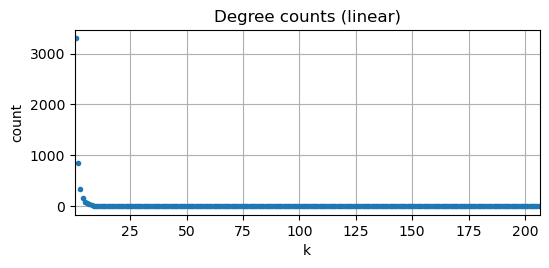

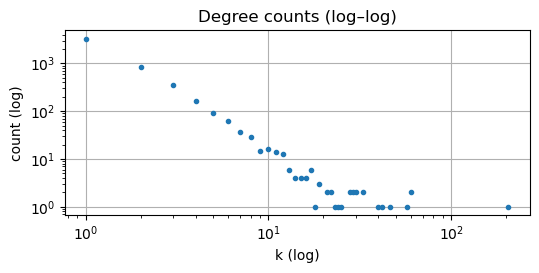

In [17]:
# Linear plot
plt.figure(figsize=(6, 2.4))
plt.plot(k_vals, counts, marker='o', linestyle='None', markersize=3)
plt.xlabel('k')
plt.ylabel('count')
plt.title('Degree counts (linear)')
plt.xlim(k_min - 0.5, k_max + 0.5)
plt.show()

# Log–log plot
mask = counts > 0
plt.figure(figsize=(6, 2.4))
plt.loglog(k_vals[mask], counts[mask], marker='o', linestyle='None', markersize=3)
plt.xlabel('k (log)')
plt.ylabel('count (log)')
plt.title('Degree counts (log–log)')
plt.show()


# Assignment 1.2 
**Explain Your process in words**
* *Document how you crawled the network*: First some helper functions were defined, using primarily the material from the course videos. A function get_url() that takes in a page title from the rockperformers list and returns the proper wikipedia URL. A function get_pages() that takes in the URL and retrieves the wiki text of the corresponding page. A function get_titles() that uses a regex to etxract all outgoing links from the text. First all the links from the "List of rock performers" page was extracted. Each performer's wikipedia page was saved locally in its own text file. Next a for loop was created over the titles from the rock performers list to open their saved wiki text. For each page a regex was used to collect outgoing links and filter them so only links that were present in rock performers list were kept. The number of words on each page was counted by computing the length of the list of extracted words using the regex expression \b\w+\b.

* *Challenges*: A main challenge was working with the regex to properly extract performer links. Initially only ASCII characters was used, which showed very early to be inefficient due to a lot of titles containing special characters like "(bands)". Another challenge was handling text encoding issues when saving and reading wiki text locally. 

* *How LLMs was used*: LLMs helped debug and refine regex expression. Specifically instead of defining what should be present using ^ it was easier to define what shouldn't be inside the double brackets[[]] using [^]. LLms also assisted with encoding issues when reading and writing wiki pages, specifically this line was given to solve issues "title_encoded = quote(title.replace(" ", "_"))".

* *Would could be done different*: Instead of saving the entire wiki page the regex could be used to extract the links to avoid saving unnecessary text. The initial list of performers could also be used to extract all unique characters that are present in the titles to help define the regex expression and easier handle the special cases. 

In [18]:
# Loading the graph
import urllib.request
import networkx as nx
url = "https://raw.githubusercontent.com/Emmsiiii/Assignment-1---02805-Social-Graphs-and-Interactions/main/rock_artists_network.gexf"
urllib.request.urlretrieve(url, "rock_artists_network.gexf")
G = nx.read_gexf("rock_artists_network.gexf")

In [19]:
# Exercise: Simple networks and statistics
# What is the number of nodes in the network ?
print(f'Number of nodes: {len(G.nodes)}')
# What is the number of links ?
print(f'Number of edges: {len(G.edges)}')

Number of nodes: 485
Number of edges: 7326


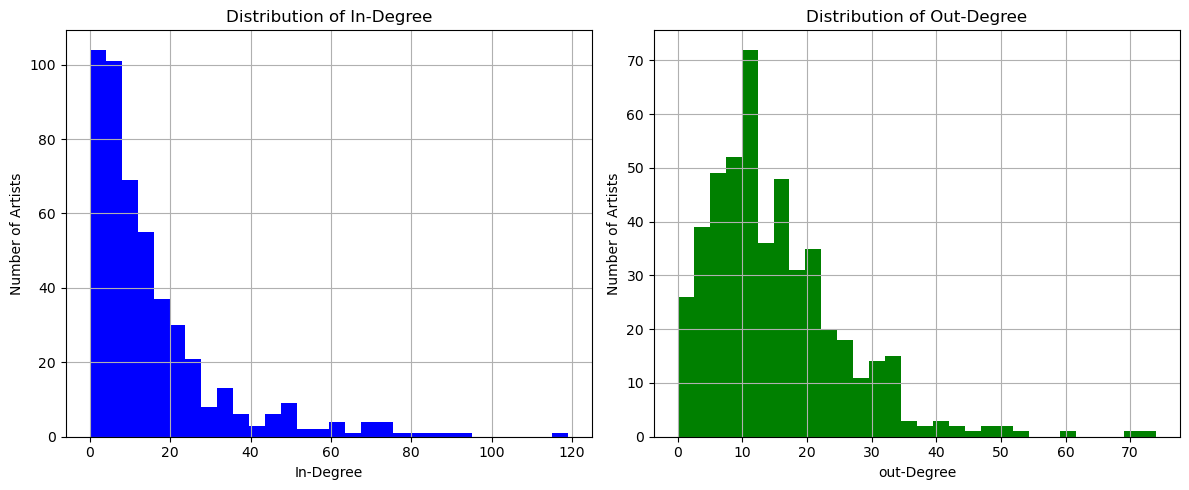

In [20]:
# Plotting the in degree distribution and out degree distribution side by side
import matplotlib.pyplot as plt
in_degrees  = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(12, 5))

# Plot in-degree distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of In-Degree')

# Plot out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='green')
plt.xlabel('out-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of Out-Degree')
plt.tight_layout()
plt.show()

**Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**

**Answer**:

In the left plot above one can observe the distribution of the in-degree values for different bands. In-degree is on x-axis so number of directed links coming in and the number artist that has the specific in degree number (within the bin of the histogram) on y-axis. It can be observed most artist have an in degree below 20 meaning most artist have fewer than 20 bands pointing to them on their wiki webpages and few have above 40. On the right is the out-degree distribution it can be observed most artist point to less than 25 other rock bands. One of the main observations and difference between the two plots is that few bands have a large in-degree value. This is properly due to the rich get richer effect. Bands like the Beatles or Led Zeppelin are some of the first major rock bands. These are the main sources of inspiration for next generation of bands that will refer to them. These resemble scale free networks

In [21]:
# Create a random graph
G_random = nx.erdos_renyi_graph(n=len(G.nodes), p=0.1, directed=True)
# Create a scale-free network
G_ba = nx.barabasi_albert_graph(n=100, m=2)
G_ba_directed = G_ba.to_directed()

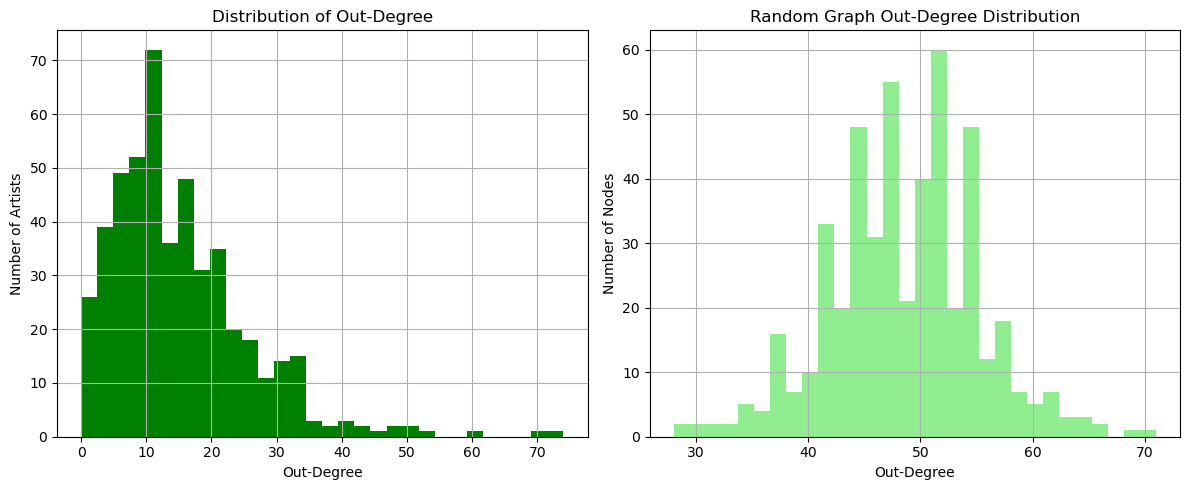

In [22]:
# Comparing outdegree distribution to a random graph
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))
# Plot out-degree distribution
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=30, color='green')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of Out-Degree')
plt.tight_layout()

# Plot the random graph out degree distribution
random_out_degrees = [G_random.out_degree(n) for n in G_random.nodes()]
plt.subplot(1, 2, 2)
plt.hist(random_out_degrees, bins=30, color='lightgreen')
plt.xlabel('Out-Degree')
plt.ylabel('Number of Nodes')
plt.title('Random Graph Out-Degree Distribution')
plt.tight_layout()
plt.show()

**Compare the out-degree distribution to a *random network* with the same number of nodes and links**:

**Answer**:

We see in the above plots the difference between a "real network" ( left) and "random network" ( right). We see the networks have some similarities with the real network being more tail heavy and the random network being more equally distributed resembling the binomial distribution.

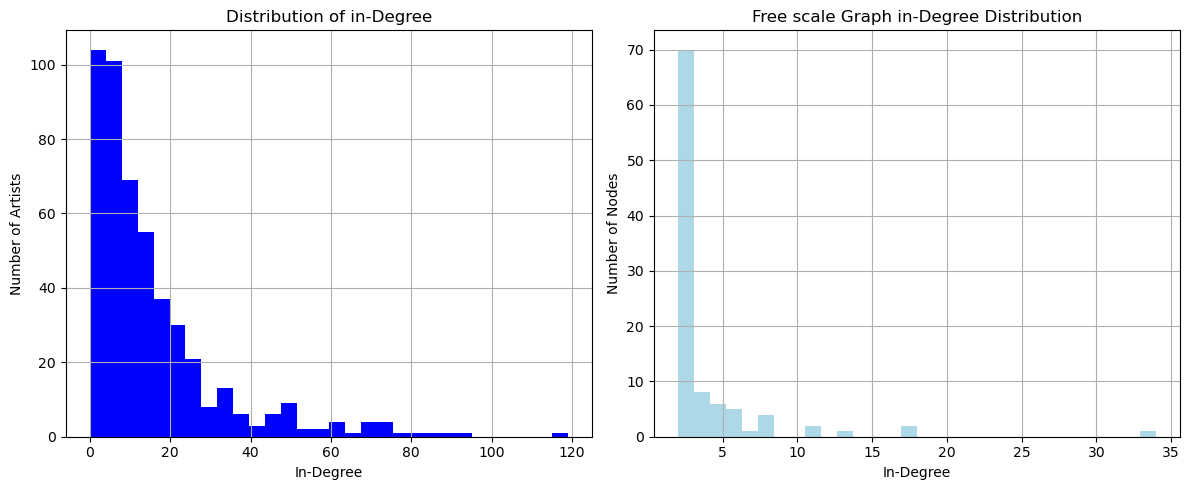

In [23]:
# Comparing out degree distribution to a random graph
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))
# Plot out-degree distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Artists')
plt.title('Distribution of in-Degree')
plt.tight_layout()

# Plot the random graph out degree distribution
ba_in_degrees = [G_ba_directed.in_degree(n) for n in G_ba_directed.nodes()]
plt.subplot(1, 2, 2)
plt.hist(ba_in_degrees, bins=30, color='lightblue')
plt.xlabel('In-Degree')
plt.ylabel('Number of Nodes')
plt.title('Free scale Graph in-Degree Distribution')
plt.tight_layout()
plt.show()

**Compare the in-degree distribution to a *scale-free* network with the same number of nodes**

**Answer**:

The above plots compares the in-degree distribution of the rock network with a scale-free network with equal number of nodes. In-degree is on x-axis and number of nodes sharing the in-degree in the bin is on y-axis. Both are right skewed an heavy tailed, meaning most artist receive few incoming links whil a disproportionate number of artist/nodes has a large in-degree number.
We see the distributions above are similar indicating the rock artist network resembles a scale free network.

In [24]:
import pandas as pd
in_degrees = dict(G.in_degree)
df_in = pd.DataFrame(list(in_degrees.items()), columns=["Artist", "InDegree"])
df_sorted_in = df_in.sort_values(by="InDegree", ascending=False)
df_sorted_in.reset_index(drop=True, inplace=True)
print("Top 5 artists by In-Degree:")
print(df_sorted_in.head(5))

out_degrees = dict(G.out_degree)
df_out = pd.DataFrame(list(out_degrees.items()), columns=["Artist", "OutDegree"])
df_sorted_out = df_out.sort_values(by="OutDegree", ascending=False)
df_sorted_out.reset_index(drop=True, inplace=True)
print("\nTop 5 artists by Out-Degree:")
print(df_sorted_out.head(5))


Top 5 artists by In-Degree:
         Artist  InDegree
0  Led Zeppelin       119
1     Bob Dylan        95
2  Queen (band)        88
3     Metallica        85
4   David Bowie        83

Top 5 artists by Out-Degree:
            Artist  OutDegree
0  Alice in Chains         74
1      Deep Purple         71
2    Black Sabbath         60
3      Def Leppard         52
4      Bryan Adams         51


**Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**:

**Answer**:

The band with most ingoing links is led zeppelin with 119 links. It makes sense they have a lot of other rock pages referring to them since
they are considered at least in rock culture as one of the biggest bands of all time. They were one of the first rock bands that took heavy influence from blues which is the precursor for a lot pop music through history. A lot of rock bands have probably cited them as an influence.

Alice in chains has the most outgoing links with 74 links. The band has done a lot of collaborations and covers which could explain at least some proportion of the outgoing links.

In [25]:
#What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?


word_counts = nx.get_node_attributes(G, 'word_count')
#print(word_counts)
df_words = pd.DataFrame(list(word_counts.items()), columns=["Artist", "WordCount"])
df_sorted_words = df_words.sort_values(by="WordCount", ascending=False)
df_sorted_words.reset_index(drop=True, inplace=True)
print(df_sorted_words.head(10))

                  Artist  WordCount
0          Guns N' Roses      60853
1               Coldplay      47028
2           Queen (band)      46197
3  Marilyn Manson (band)      46032
4     The Rolling Stones      44022
5                     U2      43048
6              Bob Dylan      42509
7            David Bowie      42408
8         Paul McCartney      42396
9             Elton John      41255


C:\Users\lucas\AppData\Local\Temp\ipykernel_21752\2456843274.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="Word count")


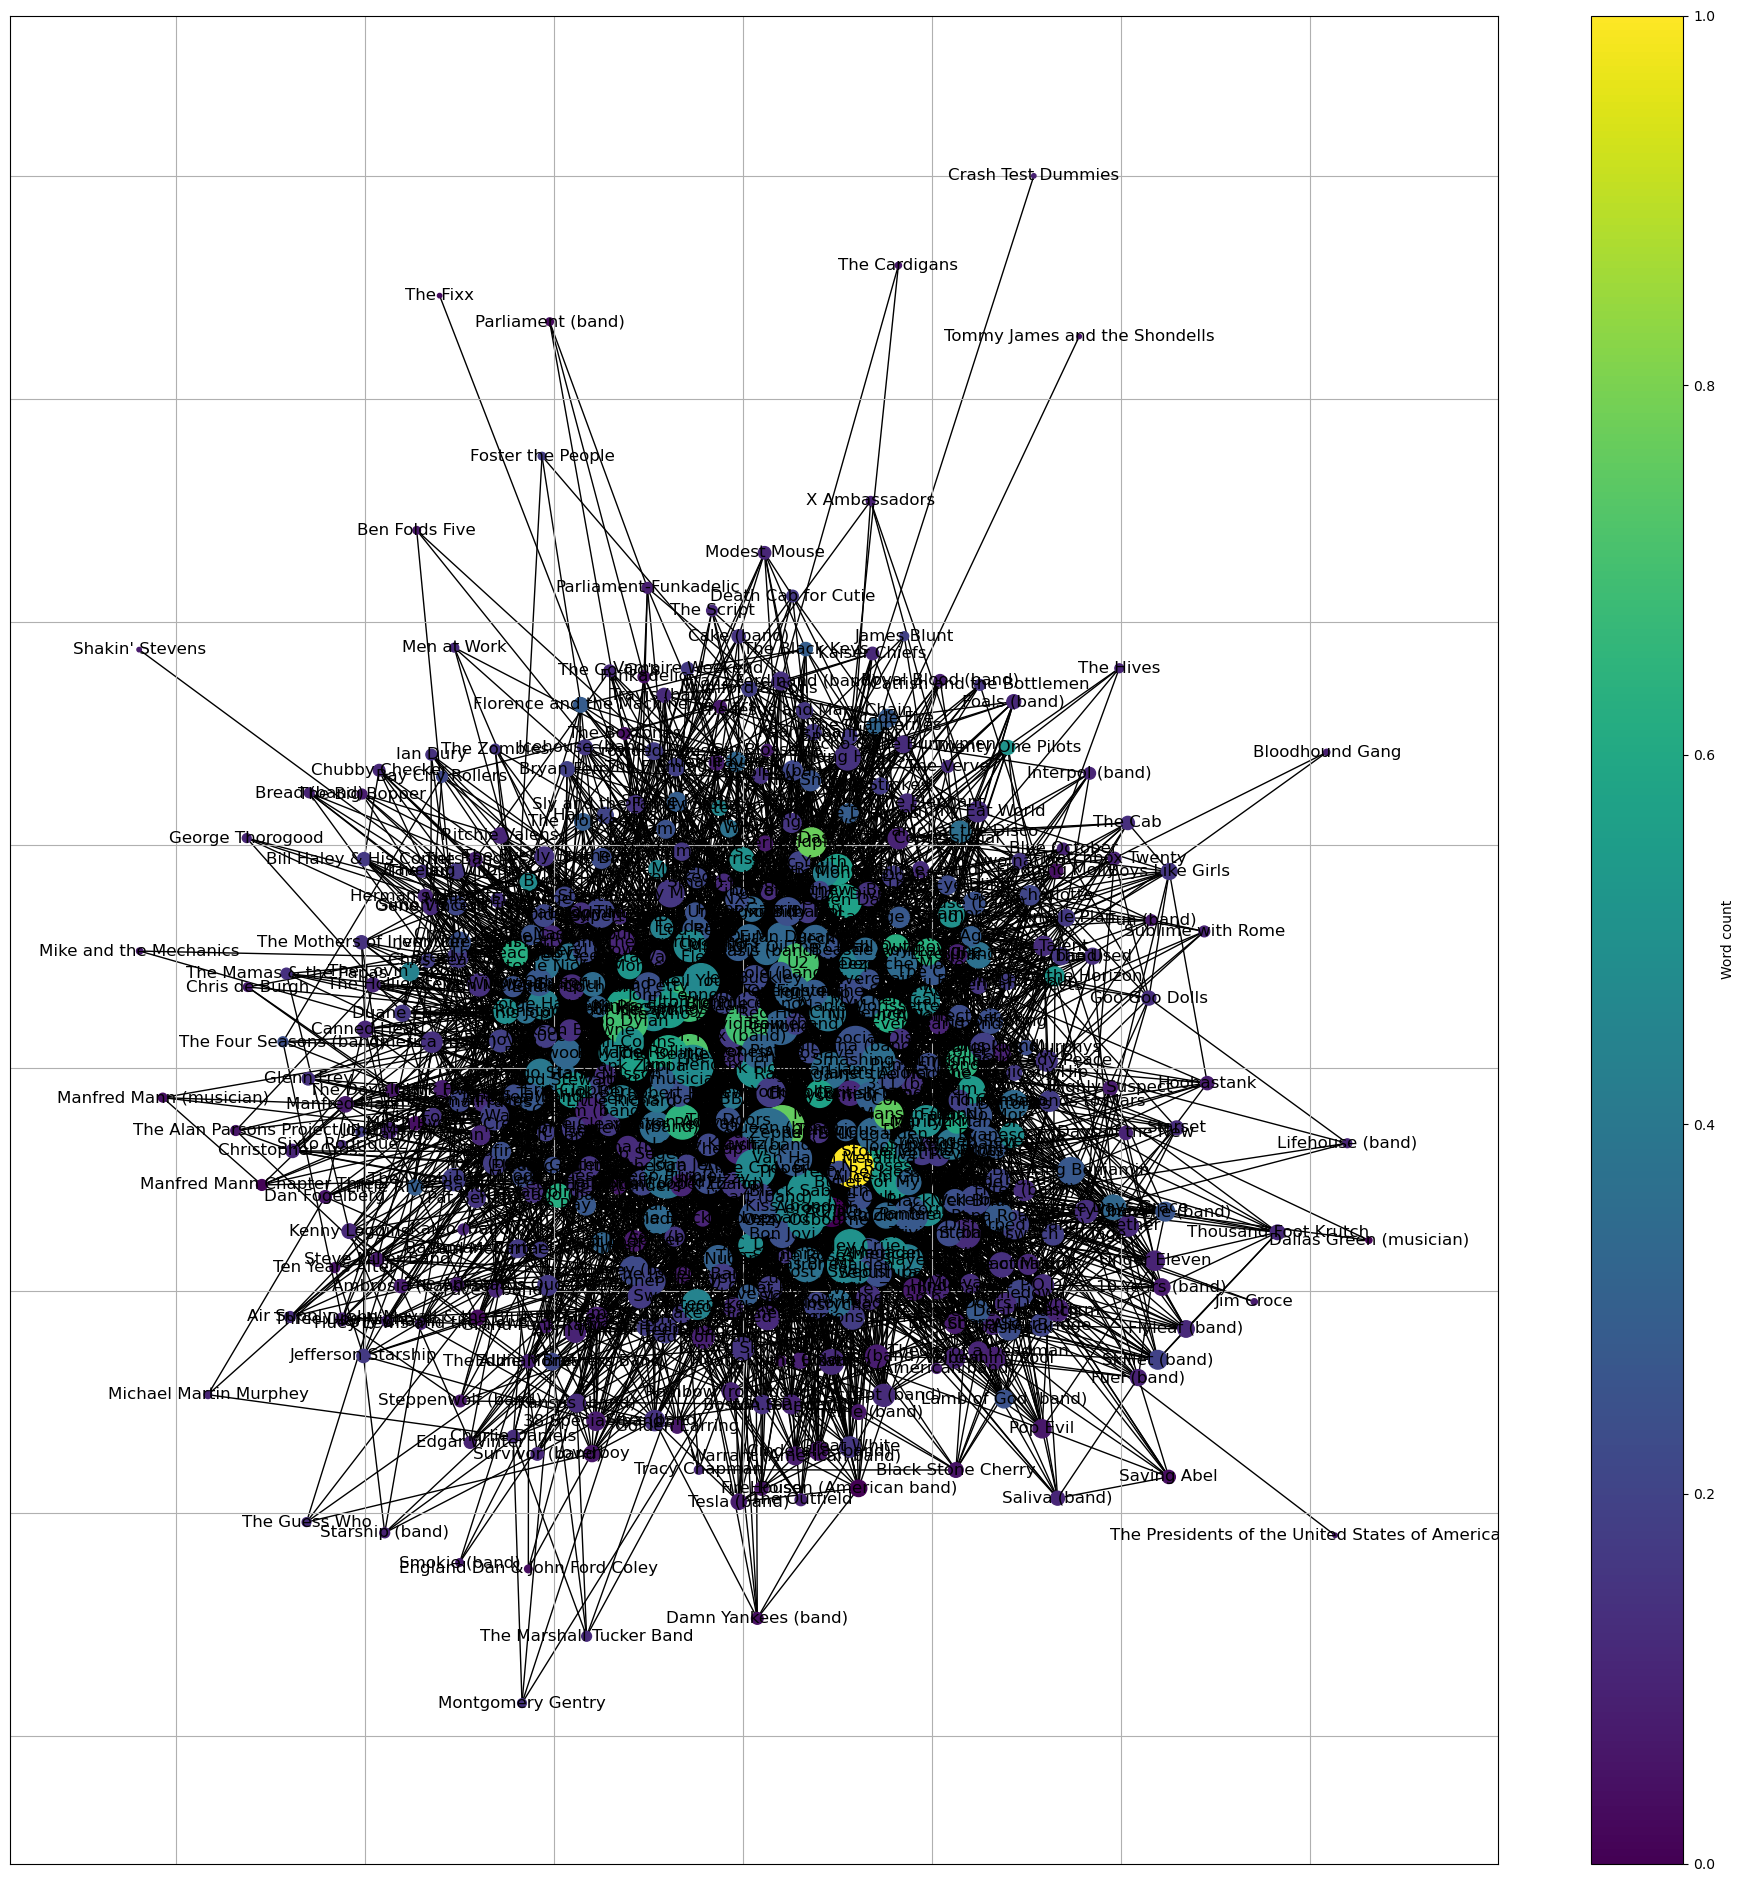

In [26]:
# Exercise: Let's build a simple visualization of the network 

# Turning G into an undirected graph 
G_un = G.to_undirected()

# Setting a larger figure size for better visibility
plt.figure(figsize=(24, 24))

# Setting layout using spring_layout 
pos = nx.spring_layout(G_un, k=0.15, iterations=100)

# Drawing the edges
nx.draw_networkx_edges(G_un, pos)

# Drawing the labels
nx.draw_networkx_labels(G_un, pos, font_size=12)

# Collecting the word counts for color mapping
word_count_values = [data.get("word_count", 0) for _, data in G_un.nodes(data=True) if data]

# Defining the colormap
cmap = plt.colormaps["viridis"]

# Drawing all nodes at once with sizes and colormap
nx.draw_networkx_nodes(G_un, pos, node_size=[G_un.degree(node) * 10 for node in G_un.nodes()], node_color=word_count_values, cmap=cmap)

# Adding a colorbar legend
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="Word count")
plt.show()


## Author contributions

- **Emma** — Primary work on **Assignment 1.1, Part 1** (setup, initial graph construction, and early analyses).
- **Oliver** — Primary work on **Assignment 1.1, Part 2** (network growth implementation and plotting).
- **Lucas** — Primary work on **Assignment 1.2** (metrics, degree distribution binning, and figures).

All group members collaborated on debugging, interpretation, and editing.  
Each member reviewed the final notebook and understands the full workflow.